# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titanic_train.csv`和`titanic_test.csv`。

`titanic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titanic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titanic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titanic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

## 读取数据

导入数据分析所需要的库，并通过Pandas的read_csv函数，将原始数据文件`titanic_train.csv`里的数据内容，解析为DataFrame并赋值给变量`original_data`。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm

In [2]:
original_data = pd.read_csv("titanic_train.csv")
original_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 评估和清理数据

在这一部分中，我们将对在上一部分建立的`original_data`DataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

为了区分开经过清理的数据和原始的数据，我们创建新的变量`cleaned_data`，让它为`original_data`复制出的副本。我们之后的清理步骤都将被运用在`cleaned_data`上。

In [3]:
cleaned_data = original_data.copy()

### 数据整齐度

In [4]:
cleaned_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


从输出结果看，`cleaned_data`共有891条数据，其中Age、Cabin和Embarked字段存在缺失值，待后续进行评估和清理

数据类型方面，PassengerId为字符串，需更改数据类型为object；Survived、Pclass、Sex、Embarked为分类变量，可更改数据类型为Category.

In [6]:
cleaned_data['PassengerId'] = cleaned_data['PassengerId'].astype('str')
cleaned_data['Survived'] = cleaned_data['Survived'].astype('category')
cleaned_data['Pclass'] = cleaned_data['Pclass'].astype('category')
cleaned_data['Sex'] = cleaned_data['Sex'].astype('category')
cleaned_data['Embarked'] = cleaned_data['Embarked'].astype('category')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


#### 处理缺失数据

从info方法的输出结果来看，cleaned_data的Age、Cabin和Embarked字段存在缺失值。

In [7]:
cleaned_data[cleaned_data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Age字段存在177条观察量的数据缺失，占总体20%左右，由于这些观察量数据较多，且其他变量仍能为分析提供价值，最好保留这些行。

但由于后续逻辑回归函数`Logit`不允许存在缺失值，所以用年龄平均值进行替换。

In [8]:
average_age = cleaned_data['Age'].mean()
cleaned_data['Age'] = cleaned_data['Age'].fillna(average_age)
cleaned_data[cleaned_data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
cleaned_data[cleaned_data['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


Cabin字段存在大量观察值缺失，说明船舱号信息在大部分观察值中都是未知的，因此对此进行保留。

此外，我们认为船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

In [10]:
cleaned_data[cleaned_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


仅有两条登船港口信息缺失，我们认为登船港口并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

#### 处理重复数据

根据变量的含义及内容看，PassengeredId是乘客的唯一标识符，不应该存在重复。

In [11]:
cleaned_data['PassengerId'].duplicated().sum()

np.int64(0)

In [12]:
cleaned_data[cleaned_data.duplicated(subset=['Ticket'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.000000,3,1,349909,21.0750,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,CA 2144,46.9000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.000000,1,0,11668,21.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.000000,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.000000,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.000000,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.000000,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q


In [13]:
Ticket_count = cleaned_data['Ticket'].value_counts()
Ticket_count[Ticket_count > 1]

Ticket
347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
           ..
364849      2
113505      2
239865      2
113803      2
237736      2
Name: count, Length: 134, dtype: int64

In [14]:
cleaned_data.query('Ticket == "347082"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


当Ticket数据相同时，可能为亲属联票，对重复情况暂不处理。

#### 处理不一致数据

不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。

In [15]:
cleaned_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
cleaned_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [17]:
cleaned_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [18]:
cleaned_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

以上结果显示该数据不存在不一致问题

#### 处理无效或错误数据

可以通过DataFrame的describe方法，对数值统计信息进行快速了解。

In [19]:
cleaned_data.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


从以上统计信息来看，cleaned_data里不存在脱离现实意义的数值。

## 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，根据泰坦尼克号乘客的相关信息，预测沉船事件发生后的生还概率。

数据变量包含乘客同乘伴侣/同胞数量，以及同乘父母/孩子数量，这些可以帮助计算出船上家庭成员的数量。我们对同乘家庭成员数量是否会显著影响幸存感兴趣，因此可以创建一个新的变量，记录这一数值。

In [20]:
cleaned_data['FamilyNum'] = cleaned_data['SibSp'] + cleaned_data['Parch']
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索数值变量的分布，以及与是否幸存存在相关性的变量，为后续的进一步分析提供方向。

In [21]:
# 设置图表色盘为"pastel"
sns.set_palette('pastel')

In [22]:
#设置图表尺寸
plt.rcParams['figure.figsize']=[7.00, 3.50]
plt.rcParams['figure.autolayout']=True

In [23]:
# 替换图表字体，如SimHei字体
matplotlib.rc("font",family='SimHei')

### 是否幸存分布

([<matplotlib.patches.Wedge at 0x1e35487af90>,
 [Text(-0.39257494735793463, 1.0275626067091557, '0'),
  Text(0.3925749146953058, -1.0275626191877425, '1')],
 [Text(-0.21413178946796432, 0.5604886945686304, '61.6%'),
  Text(0.21413177165198496, -0.5604887013751322, '38.4%')])

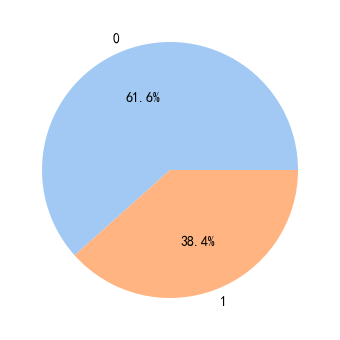

In [24]:
Survived_count = cleaned_data['Survived'].value_counts()
Survived_label = Survived_count.index
plt.pie(Survived_count, labels = Survived_label, autopct='%.1f%%')

以上数据显示更多的乘客未能幸存，占比超过60%。

### 乘客年龄

<Axes: ylabel='Age'>

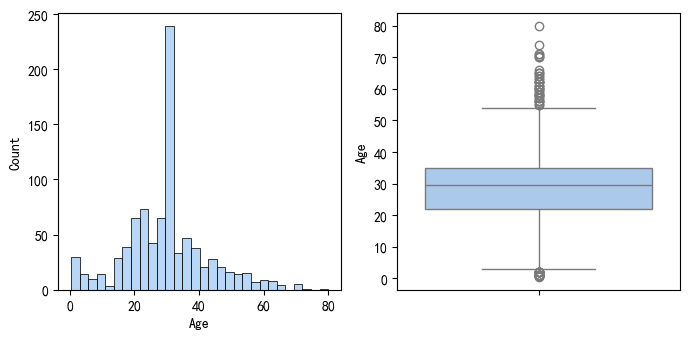

In [25]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x='Age',ax=axes[0])
sns.boxplot(cleaned_data, y='Age',ax=axes[1])

大多数乘客年龄位于20岁到40岁之间，但有不少老年乘客以及婴儿。

### 乘客年龄与是否幸存

<Axes: xlabel='Age', ylabel='Count'>

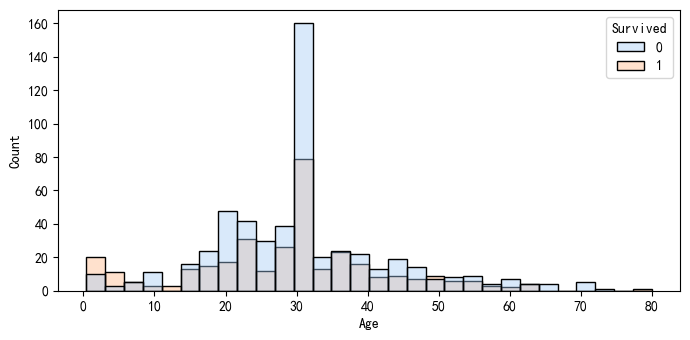

In [26]:
sns.histplot(cleaned_data, x='Age', hue='Survived', multiple='layer', alpha=0.4)

从乘客年龄直方图来看，只有婴儿群体幸存比例较高，绝大部分其余年龄段都是遇难人数多于幸存人数。

<Axes: xlabel='Age', ylabel='Count'>

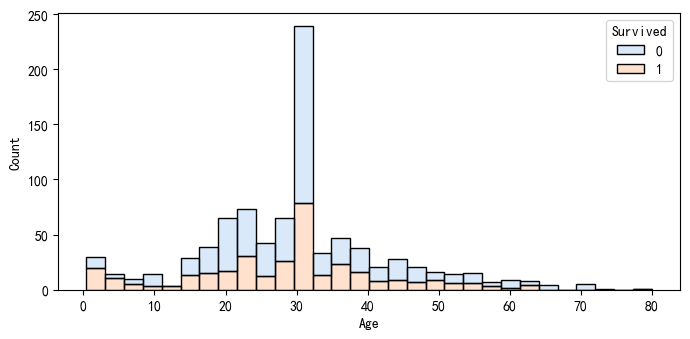

In [27]:
#stack堆叠图
sns.histplot(cleaned_data, x='Age', hue='Survived', multiple='stack', alpha=0.4)

### 船票金额分布

<Axes: ylabel='Fare'>

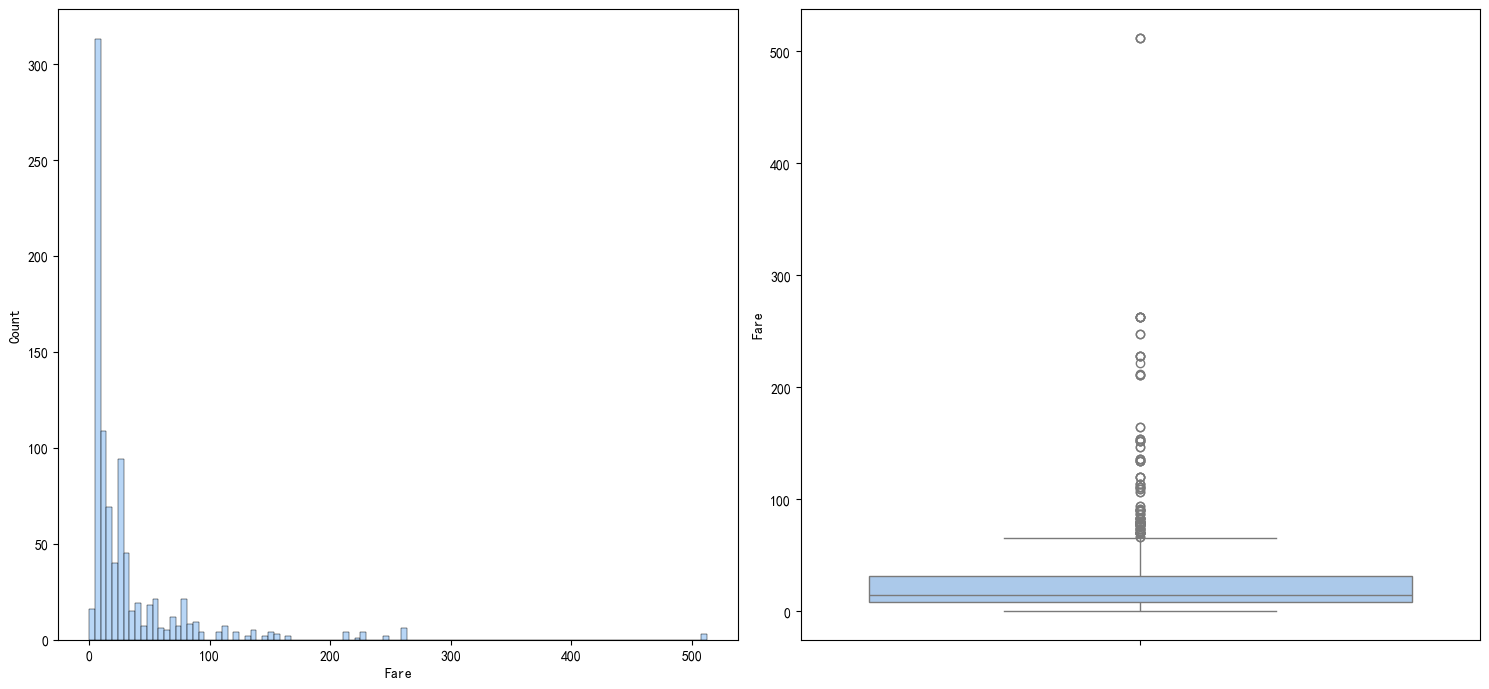

In [28]:
figure, axes = plt.subplots(1, 2, figsize=[15, 7])
sns.histplot(cleaned_data, x='Fare',ax=axes[0])
sns.boxplot(cleaned_data, y='Fare',ax=axes[1])

船票金额大致呈现右偏态分布，大部分乘客的票价中等，但有一些票价很高的极端值，使得均值被拉高。

### 船票金额与是否幸存

<Axes: xlabel='Fare', ylabel='Count'>

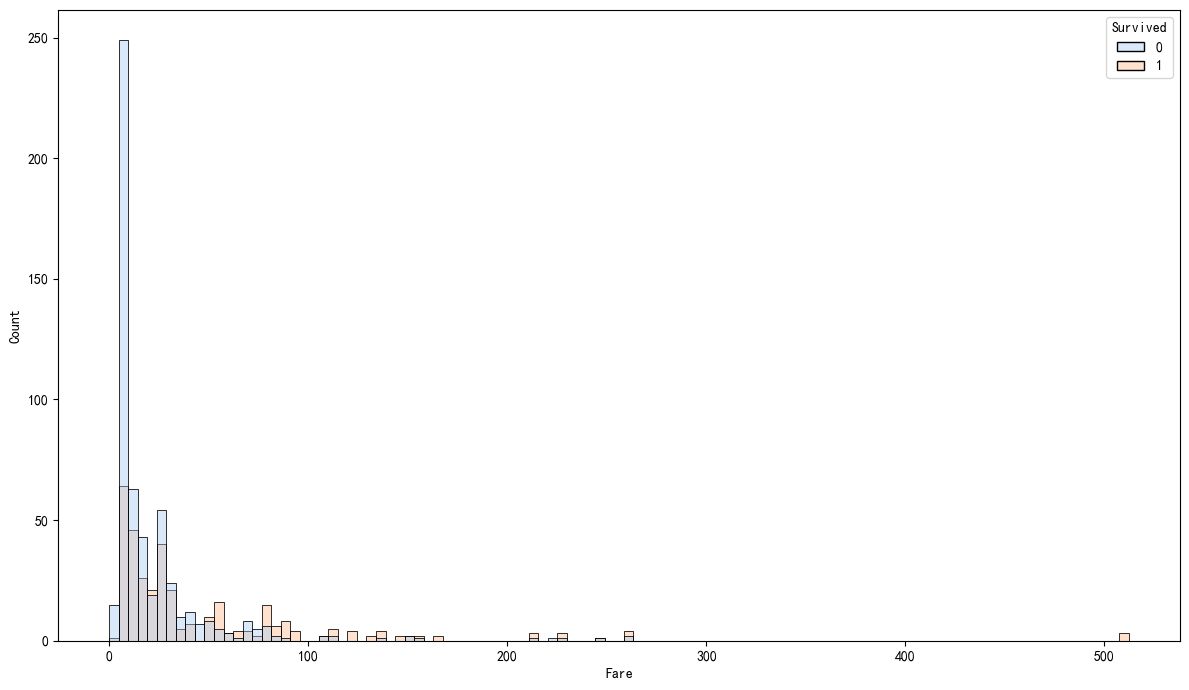

In [29]:
figure, axes = plt.subplots(1, 1, figsize=[12, 7])
sns.histplot(cleaned_data, x='Fare', hue='Survived', multiple='layer', alpha=0.4)

从船票价格直方图来看，票价较高的乘客幸存概率更高。

### 船舱等级与是否幸存

<Axes: xlabel='Pclass', ylabel='count'>

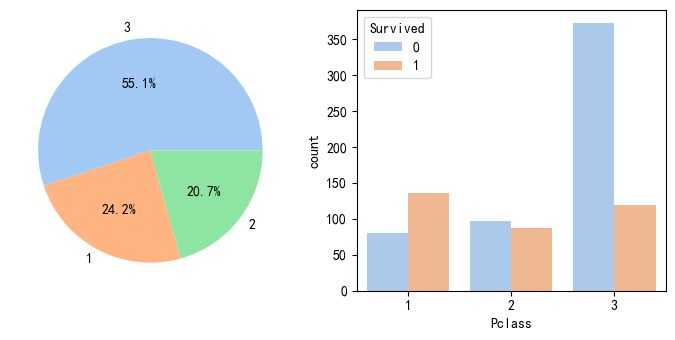

In [30]:
figure, axes = plt.subplots(1, 2)
Pclass_count = cleaned_data['Pclass'].value_counts()
Pclass_label = Pclass_count.index
axes[0].pie(Pclass_count, labels = Pclass_label, autopct='%.1f%%')
sns.countplot(cleaned_data, x='Pclass', hue='Survived', ax=axes[1])

以上数据显示，三等舱乘客占比最多，超过55%，其次是一等舱乘客，最少的是二等舱乘客，占比约为1/5.

根据舱位等级与平均幸存率的柱状图分布可以看出，舱位等级为一等舱的，幸存比例最高，其次为二等舱乘客的幸存比例，三等舱乘客幸存率最比例。

### 性别与是否幸存

<Axes: xlabel='Survived', ylabel='count'>

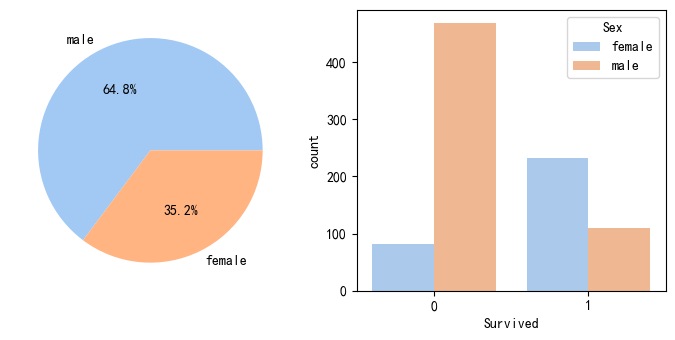

In [31]:
figure, axes = plt.subplots(1, 2)
Sex_count = cleaned_data['Sex'].value_counts()
Sex_label = Sex_count.index
axes[0].pie(Sex_count, labels = Sex_label, autopct='%.1f%%')
sns.countplot(cleaned_data, x='Survived', hue='Sex', ax=axes[1])

以上数据显示，男性乘客占比相对较多，接近65%，女性乘客占比约为35%。

根据性别与是否幸存的柱状图分布可以看出，男性乘客的遇难比例更高，女性乘客幸存比例更高。

### 登船港口与是否幸存

<Axes: xlabel='Embarked', ylabel='count'>

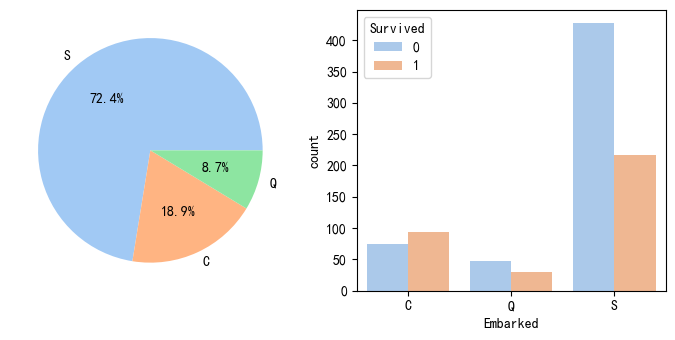

In [32]:
figure, axes = plt.subplots(1, 2)
Embarked_count = cleaned_data['Embarked'].value_counts()
Embarked_label = Embarked_count.index
axes[0].pie(Embarked_count, labels = Embarked_label, autopct='%.1f%%')
sns.countplot(cleaned_data, x='Embarked', hue="Survived", ax=axes[1])

根据登船港口计数图分布，在S 南安普敦港口登船的人数最多，占比超过72.4%，在Q 皇后镇港口登船的人数最少。

根据登船港口和是否幸存的柱状分布可看出，在C 瑟堡港口登船的乘客幸存数量大于遇难数量，而Q 皇后镇港口和S 南安普敦港口登船的乘客则相反。

### 家庭成员数量与是否幸存

<Axes: xlabel='FamilyNum', ylabel='count'>

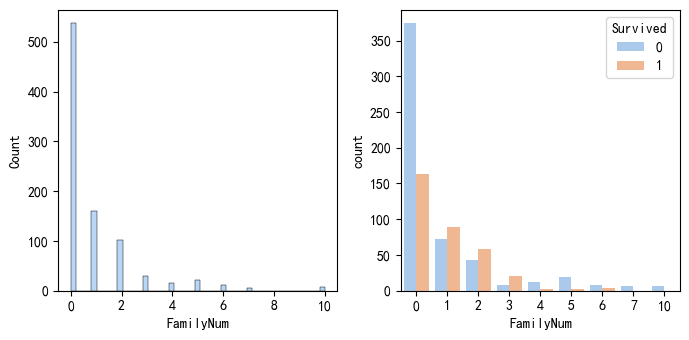

In [33]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x="FamilyNum", ax=axes[0])
sns.countplot(cleaned_data, x='FamilyNum', hue="Survived", ax=axes[1])

根据家庭成员数量计数图分布，同乘人数范围为0-10，其中绝大多数乘客没有同乘人。

根据家庭成员数量和是否幸存的柱状分布可看出，独身的乘客遇难人数大于幸存人数。从有携带家庭成员的乘客来看，同乘人数在1-3人时，幸存人数大于遇难人数；但超过3人时，遇难的更多。

<Axes: xlabel='Parch', ylabel='Survived'>

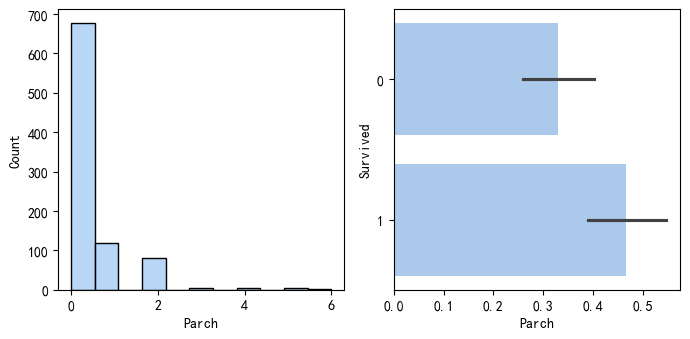

In [34]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x="Parch", ax=axes[0])
sns.barplot(cleaned_data, x='Parch', y="Survived", ax=axes[1])

根据同乘父母/孩子数量计数图分布，同乘人数范围为0-6，其中绝大多数乘客没有同乘人，其次为同乘人为1人的乘客，为100人左右。

根据同乘的伴侣/同胞数量和是否幸存的柱状分布可看出，同乘伴侣/同胞数量在1-4人时，人数越多，幸存率越低；超过4人时，平均幸存率为0（也可能受样本数量限制）；同乘人数为1人时，幸存率最高，超过50%；其次是没有同乘伴侣或同胞的乘客，平均幸存率接近35%。

## 分析数据

在分析步骤中，我们将利用`cleaned_data`的数据，进行逻辑回归分析，目标是得到一个可以根据房屋各个属性对价格进行预测的数学模型。

然后可以创建一个新的DataFrame `lr_titanic_train`，让它作为我们进行逻辑回归分析所用的数据。

和`cleaned_data`区分开的原因是，我们在进行回归分析前，还可能需要对数据进行一些准备，比如引入虚拟变量，这些都可以在`lr_titanic_train`上执行。

In [35]:
lr_titanic_train = cleaned_data.copy()
lr_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


根据探索数据阶段的分析，有些变量大概率与是否幸存无关，移除该类变量后重新创建新的数据集。

In [36]:
lr_titanic_train = lr_titanic_train.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked'], axis=1)
lr_titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


### 创建虚拟变量

In [37]:
lr_titanic_train = pd.get_dummies(lr_titanic_train, columns=['Pclass','Sex'], 
                                dtype=int, drop_first=True)
lr_titanic_train

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.000000,1,0,7.2500,1,0,1,1
1,1,38.000000,1,0,71.2833,1,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0
3,1,35.000000,1,0,53.1000,1,0,0,0
4,0,35.000000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,0,0
888,0,29.699118,1,2,23.4500,3,0,1,0
889,1,26.000000,0,0,30.0000,0,0,0,1


### 划分自变量和因变量

In [38]:
y = lr_titanic_train['Survived']
X = lr_titanic_train.drop(['Survived'], axis=1)

### 检验变量相关性

一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以我们检查的时候，找绝对值大于0.8的值即可。

In [39]:
X.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,True


<function matplotlib.pyplot.show(close=None, block=None)>

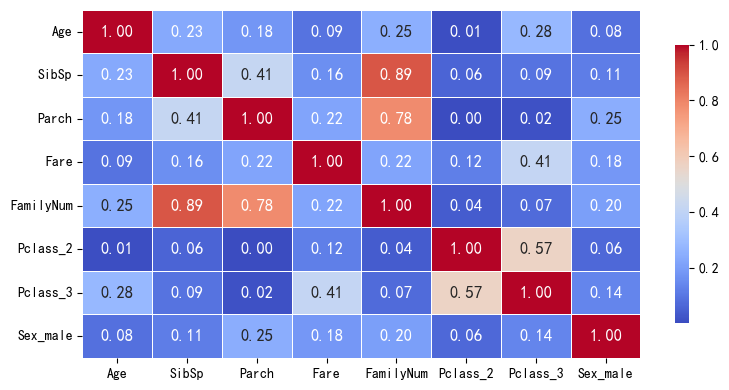

In [40]:
#热力图展示相关系数
# 设置图形大小（增大尺寸）
plt.figure(figsize=(8, 4))

sns.heatmap(X.corr().abs(), annot=True,
           fmt='.2f',# 两位小数
            annot_kws={"size": 12},  # 批注字体大小
            cmap='coolwarm',  # 使用更清晰的颜色映射
            linewidths=0.5,  # 单元格之间的线条宽度
            cbar_kws={"shrink": 0.8}  # 颜色条大小
           )
# 自动调整布局
plt.tight_layout()

plt.show    

从以上输出来看，SibSp和FamilyNum之间的相关系数绝对值大于0.8。这符合预期，因为FamilyNum是根据SibSp和Parch计算出来的。

不同变量之间的如果相关性过高，会导致数值优化算法无法收敛，无法获得逻辑回归模型参数的计算结果，因此我们需要移除FamilyNum或SibSp。我们对同乘家庭成员是否会影响幸存概率感兴趣，所以保留FamilyNum。

此外，如果仔细看相关系数数值，会发现Parch和FamilyNum之间也存在强相关，相关系数为0.78，接近0.8，因此我们也对Parch进行移除，避免算法无法收敛。

In [41]:
X = X.drop(['SibSp', 'Parch'], axis=1)

In [42]:
X.corr().abs() > 0.8

,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False
Fare,False,True,False,False,False,False
FamilyNum,False,False,True,False,False,False
Pclass_2,False,False,False,True,False,False
Pclass_3,False,False,False,False,True,False
Sex_male,False,False,False,False,False,True


相关性结果显示相关性满足要求，相关系数r均<=0.8

### 添加常量引入截距

In [43]:
X = sm.add_constant(X)

### 建立回归方程

In [44]:
#调用sm.Logit()
result = sm.Logit(y, X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Fri, 13 Jun 2025   Pseudo R-squ.:                  0.3339
Time:                        19:09:05   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

设置显著水平为0.05，以上结果显示，模型表面Fare费用字段对幸存概率没有显著性影响，因此根据p值大小去掉Fare自变量后重新建立方程

In [45]:
X = X.drop('Fare', axis=1)
#重新调用sm.Logit()
result = sm.Logit(y, X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Fri, 13 Jun 2025   Pseudo R-squ.:                  0.3323
Time:                        19:09:05   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

逻辑回归模型结果显示以下变量的增加（或存在）或将降低乘客的幸存机率：年龄、家庭成员数量、不在一等舱、性别为男性。



要理解各个自变量系数的实际含义，需要计算自然常数的次方。

In [46]:
# Age
np.exp(-0.0395)

np.float64(0.9612699539905982)

以上结果说明，年龄每增加一岁，生还概率降低4%左右。

In [47]:
# FamilyNum
np.exp(-0.2186)

np.float64(0.803643111115195)

以上结果说明，家庭成员每增加一位，生还概率降低20%左右。

In [48]:
# Pclass_2
np.exp(-1.1798)

np.float64(0.30734020049483596)

以上结果说明，二等舱乘客的生还概率比一等舱乘客低71%左右。

In [49]:
# Pclass_3
np.exp(-2.3458)

np.float64(0.09577055503172162)

以上结果说明，三等舱乘客的生还概率比一等舱乘客低90%左右。

In [50]:
# Sex_male
np.exp(-2.7854)

np.float64(0.061704402333015156)

以上结果说明，男性乘客的生还概率比女性低94%左右。

根据模型参数值，总结：
- 年龄小的乘客生还概率更高；
- 女性乘客的生还概率比男性乘客的生还概率更高；
- 来自的船舱等级高的乘客生还概率更高；
- 同乘家庭成员少的乘客生还概率更高。

前两条背后的原因可能与泰坦尼克号沉船后逃生时，“让孩子和女性先走”的原则。第三条说明可能当时舱位更尊贵的乘客拥有了优先逃生的机会。第四条可能是因为拥有较大数量家庭成员的乘客在灾难发生时会急于解救其他家庭成员而非选择逃生，最后也失去了自己逃生的机会。

## 模型预测

得到模型后，我们将用于预测`titanic_test.csv`里泰坦尼克号乘客的生还情况。

首先读取`titanic_test.csv`的数据。

In [51]:
test_data = pd.read_csv("titanic_test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


建立新的数据集`new_test_data`，根据逻辑回归模型新增FamilyNum变量，移除多余变量，并处理虚拟变量。

In [52]:
new_test_data = test_data.copy()
new_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [53]:
age_average = new_test_data['Age'].mean()
new_test_data['Age'] = new_test_data['Age'].fillna(age_average)
new_test_data['Age'].isna().sum()

np.int64(0)

In [54]:
new_test_data['FamilyNum'] = new_test_data['SibSp'] + new_test_data['Parch']

In [55]:
new_test_data=new_test_data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
new_test_data.head()

,Pclass,Sex,Age,FamilyNum
0,3,male,34.5,0
1,3,female,47.0,1
2,2,male,62.0,0
3,3,male,27.0,0
4,3,female,22.0,2


In [56]:
new_test_data['Pclass']=new_test_data['Pclass'].astype('category')
new_test_data['Sex']=new_test_data['Sex'].astype('category')
new_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     418 non-null    category
 1   Sex        418 non-null    category
 2   Age        418 non-null    float64 
 3   FamilyNum  418 non-null    int64   
dtypes: category(2), float64(1), int64(1)
memory usage: 7.7 KB


In [57]:
new_test_data = pd.get_dummies(new_test_data, columns=['Pclass','Sex'], dtype=int, drop_first=True)
new_test_data

,Age,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,34.50000,0,0,1,1
1,47.00000,1,0,1,0
2,62.00000,0,1,0,1
3,27.00000,0,0,1,1
4,22.00000,2,0,1,0
...,...,...,...,...,...
413,30.27259,0,0,1,1
414,39.00000,0,0,0,0
415,38.50000,0,0,1,1
416,30.27259,0,0,1,1


### 添加常量引入截距

In [58]:
new_test_data = sm.add_constant(new_test_data)
new_test_data

,const,Age,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,1.0,34.50000,0,0,1,1
1,1.0,47.00000,1,0,1,0
2,1.0,62.00000,0,1,0,1
3,1.0,27.00000,0,0,1,1
4,1.0,22.00000,2,0,1,0
...,...,...,...,...,...,...
413,1.0,30.27259,0,0,1,1
414,1.0,39.00000,0,0,0,0
415,1.0,38.50000,0,0,1,1
416,1.0,30.27259,0,0,1,1


### 调用逻辑回归方程进行预测

In [59]:
test_result = result.predict(new_test_data)
test_result

0      0.080778
1      0.411265
2      0.086917
3      0.105684
4      0.601091
         ...   
413    0.094075
414    0.925647
415    0.069798
416    0.094075
417    0.062849
Length: 418, dtype: float64

In [60]:
test_result > 0.5

0      False
1      False
2      False
3      False
4       True
       ...  
413    False
414     True
415    False
416    False
417    False
Length: 418, dtype: bool